<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Parsa Hatami

**Student ID**: 400100962





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [2]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

In [3]:
class MyLogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [4]:
# Load data
data = pd.read_csv('Q2\Logistic_question.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
model = MyLogisticRegression(lr=0.1, num_iter=300000)
model.fit(X, y)

predictions = model.predict(X, 0.5)

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [6]:
# Your code goes here!

#data['Target'] = (data['Target'] > 0).astype(int)
data['Target'] = np.where(data['Target'] > 0.5, 1, 0)

X = data.drop('Target', axis=1).values
y = data['Target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = MyLogisticRegression(lr=0.01, num_iter=1000000)
model.fit(X_train, y_train)

y_pred_prob = model.predict_prob(X_test)
threshold = 0.5 if np.mean(y_pred_prob) < 0.7 else 0.7
y_pred = y_pred_prob >= threshold

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Accuracy:  0.925
Precision:  0.9571428571428572
Recall:  0.9571428571428572
F1 Score:  0.9571428571428572


In [8]:
# Your code goes here!

#data['Target'] = (data['Target'] > 0).astype(int)
data['Target'] = np.where(data['Target'] > 0.5, 1, 0)

X = data.drop('Target', axis=1).values
y = data['Target'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

model = MyLogisticRegression(lr=0.01, num_iter=1000000)
model.fit(X_train, y_train)

y_val_pred_prob = model.predict_prob(X_val)

# Try different threshold values
thresholds = np.arange(0, 1, 0.01)
best_threshold = 0
best_score = 0
for threshold in thresholds:
    y_val_pred = y_val_pred_prob >= threshold
    score = f1_score(y_val, y_val_pred)
    if score > best_score:
        best_score = score
        best_threshold = threshold

# Use the best threshold to make predictions on the test set
y_pred_prob = model.predict_prob(X_test)
y_pred = y_pred_prob >= best_threshold

print("Best Threshold: ", best_threshold)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Best Threshold:  0.43
Accuracy:  0.9333333333333333
Precision:  0.9310344827586207
Recall:  1.0
F1 Score:  0.9642857142857143


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**
1. **Accuracy**: This is the ratio of correct predictions to the total number of predictions. It's a good general-purpose metric for classification tasks. However, it can be misleading if the classes are imbalanced. For example, if 95% of your data belongs to class A, a model that always predicts class A will have 95% accuracy, but it's not a good model.

2. **Precision**: This is the ratio of true positive predictions (correctly predicted positives) to all positive predictions (both correctly and incorrectly predicted positives). Precision is a good metric to use when the cost of a false positive is high. For example, in email spam detection, you'd want high precision because falsely classifying a legitimate email as spam (a false positive) could cause the user to miss important emails.

3. **Recall (Sensitivity)**: This is the ratio of true positive predictions to all actual positives. Recall is a good metric to use when the cost of a false negative is high. For example, in medical diagnosis, you'd want high recall because failing to diagnose a disease when the patient actually has it (a false negative) could have serious consequences.

4. **F1 Score**: This is the harmonic mean of precision and recall. It tries to balance the two and is a good metric to use when you want to optimize both precision and recall. For example, in information retrieval tasks (like search engines), you'd want both high precision (to ensure the results are relevant) and high recall (to ensure you're not missing any relevant results), so F1 score would be a good metric to optimize.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [9]:
from sklearn.linear_model import LogisticRegression

# Your code goes here!

#data['Target'] = (data['Target'] > 0).astype(int)
data['Target'] = np.where(data['Target'] > 0.5, 1, 0)

X = data.drop('Target', axis=1).values
y = data['Target'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_val_pred_prob = model.predict_proba(X_val)[:, 1]

# Try different threshold values
thresholds = np.arange(0, 1, 0.01)
best_threshold = 0
best_score = 0
for threshold in thresholds:
    y_val_pred = y_val_pred_prob >= threshold
    score = f1_score(y_val, y_val_pred)
    if score > best_score:
        best_score = score
        best_threshold = threshold

# Use the best threshold to make predictions on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = y_pred_prob >= best_threshold

print("Best Threshold: ", best_threshold)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Best Threshold:  0.47000000000000003
Accuracy:  0.9166666666666666
Precision:  0.9152542372881356
Recall:  1.0
F1 Score:  0.9557522123893806


now test with the same threshold as the previous part for comparing methods with same thresholds

In [11]:
from sklearn.linear_model import LogisticRegression

# Your code goes here!

#data['Target'] = (data['Target'] > 0).astype(int)
data['Target'] = np.where(data['Target'] > 0.5, 1, 0)

X = data.drop('Target', axis=1).values
y = data['Target'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_val_pred_prob = model.predict_proba(X_val)[:, 1]

# Try different threshold values
thresholds = np.arange(0, 1, 0.01)
best_threshold = 0.43
best_score = 0

# Use the best threshold to make predictions on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = y_pred_prob >= best_threshold

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Accuracy:  0.9166666666666666
Precision:  0.9152542372881356
Recall:  1.0
F1 Score:  0.9557522123893806


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**
The performance of my function and the built-in function are quite similar, but my function has a slightly higher accuracy, precision, and F1 score. This could be due to differences in the implementation of the logistic regression algorithm, the optimization method used, or the default parameters of the built-in function.

The built-in `LogisticRegression` function in sklearn has several parameters that can affect the model's performance:

- `penalty`: This is used to specify the norm used in the penalization (regularization). The 'newton-cg', 'sag' and 'lbfgs' solvers support only l2 penalties. 'elasticnet' is only supported by the 'saga' solver. If 'none' (not supported by the liblinear solver), no regularization is applied.

- `dual`: This parameter is Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features.

- `tol`: This is the tolerance for stopping criteria. This tells the algorithm to stop searching for a minimum (or maximum) once the function value changes less than a specific amount (the tol value) after one iteration.

- `C`: This is the inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

- `fit_intercept`: Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.

- `intercept_scaling`: Useful only when the solver 'liblinear' is used and self.fit_intercept is set to True. In this case, x becomes [x, self.intercept_scaling], i.e. a "synthetic" feature with constant value equal to intercept_scaling is appended to the instance vector. The intercept becomes intercept_scaling * synthetic_feature_weight.

- `class_weight`: Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

- `random_state`: The seed of the pseudo random number generator to use when shuffling the data.

- `solver`: Algorithm to use in the optimization problem. For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones. For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss; 'liblinear' is limited to one-versus-rest schemes.

- `max_iter`: Maximum number of iterations taken for the solvers to converge.

- `multi_class`: If the option chosen is 'ovr', then a binary problem is fit for each label. For 'multinomial' the loss minimizes the multinomial loss fit across the entire probability distribution, even when the data is binary. 'multinomial' is unavailable when solver='liblinear'. 'auto' selects 'ovr' if the data is binary, or if solver='liblinear', and otherwise selects 'multinomial'.

- `verbose`: For the liblinear and lbfgs solvers set verbose to any positive number for verbosity.

- `warm_start`: If set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. Useless for liblinear solver.

- `n_jobs`: Number of CPU cores used when parallelizing over classes if multi_class='ovr'". This parameter is ignored when the solver is set to 'liblinear' regardless of whether 'multi_class' is specified or not. If given a value of -1, all processors are used.

- `l1_ratio`: The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'. Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.

These parameters can be tuned to improve the performance of the model. However, it's important to note that increasing the model's complexity (e.g., by decreasing the regularization strength) can lead to overfitting, where the model performs well on the training data but poorly on new, unseen data.

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [13]:
class MyMultinomialLogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def softmax(self, z):
        e = np.exp(z - np.max(z))
        return e / np.sum(e, axis=1, keepdims=True)

    def loss(self, h, y):
        return (-y * np.log(h)).mean()

    def fit(self, X, y):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros((1, num_classes))

        y_encoded = np.zeros((num_samples, num_classes))
        y_encoded[np.arange(num_samples), y] = 1

        for i in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.softmax(linear_model)

            gradient_w = (1 / num_samples) * np.dot(X.T, (y_predicted - y_encoded))
            gradient_b = (1 / num_samples) * np.sum(y_predicted - y_encoded, axis=0)

            self.weights -= self.learning_rate * gradient_w
            self.bias -= self.learning_rate * gradient_b

            if i % 100 == 0:
                h = self.softmax(np.dot(X, self.weights) + self.bias)
                print(f'loss: {self.loss(h, y_encoded)} \t')

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.softmax(linear_model)
        return np.argmax(y_predicted, axis=1)

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [14]:
# Your code goes here!

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('Q2/Logistic_question.csv')
X = data.drop('Target', axis=1).values  
y = data['Target'].values  

for i in range(2, 11):
    discretizer = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy='uniform')
    y_quantized = discretizer.fit_transform(y.reshape(-1, 1)).ravel()

    y_quantized = y_quantized.astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y_quantized, test_size=0.2, random_state=42)

    # Normalize
    normalizer = StandardScaler()
    X_train = normalizer.fit_transform(X_train)
    X_test = normalizer.transform(X_test)

    model = MyMultinomialLogisticRegression()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy (Multinomial Logistic Regression, {i} levels): {accuracy:.4f}")
    print(f"Precision (Multinomial Logistic Regression, {i} levels): {precision:.4f}")
    print(f"Recall (Multinomial Logistic Regression, {i} levels): {recall:.4f}")
    print(f"F1-score (Multinomial Logistic Regression, {i} levels): {f1:.4f}")

loss: 0.34189943751907315 	
loss: 0.2167045223666772 	
loss: 0.19424229696407083 	
loss: 0.18266524045827803 	
loss: 0.17547748292580692 	
loss: 0.17065716122699479 	
loss: 0.16725363425823372 	
loss: 0.1647529290011788 	
loss: 0.16285593160674108 	
loss: 0.1613788710202267 	
Accuracy (Multinomial Logistic Regression, 2 levels): 0.8750
Precision (Multinomial Logistic Regression, 2 levels): 0.8746
Recall (Multinomial Logistic Regression, 2 levels): 0.8750
F1-score (Multinomial Logistic Regression, 2 levels): 0.8723
loss: 0.3625432552136848 	
loss: 0.23672519325207678 	
loss: 0.21230077651921525 	
loss: 0.20045339318881605 	
loss: 0.19279794521680327 	
loss: 0.18722633511849873 	
loss: 0.18291071134039688 	
loss: 0.1794365569545727 	
loss: 0.17656399334695275 	
loss: 0.17414072387999283 	
Accuracy (Multinomial Logistic Regression, 3 levels): 0.7500
Precision (Multinomial Logistic Regression, 3 levels): 0.7909
Recall (Multinomial Logistic Regression, 3 levels): 0.7500
F1-score (Multinomia

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetri

Accuracy (Multinomial Logistic Regression, 7 levels): 0.5250
Precision (Multinomial Logistic Regression, 7 levels): 0.5380
Recall (Multinomial Logistic Regression, 7 levels): 0.5250
F1-score (Multinomial Logistic Regression, 7 levels): 0.4869
loss: 0.25932538572159214 	
loss: 0.22229153295338472 	
loss: 0.20669521098725285 	
loss: 0.19759697497213632 	
loss: 0.19118499096203262 	
loss: 0.18623059616167714 	
loss: 0.18220675278165627 	
loss: 0.17883645358331018 	
loss: 0.17595344567324442 	
loss: 0.17344854815104846 	
Accuracy (Multinomial Logistic Regression, 8 levels): 0.4625
Precision (Multinomial Logistic Regression, 8 levels): 0.3872
Recall (Multinomial Logistic Regression, 8 levels): 0.4625
F1-score (Multinomial Logistic Regression, 8 levels): 0.3793
loss: 0.24363099634333787 	
loss: 0.21127971814832014 	
loss: 0.19700358326468717 	
loss: 0.1886309529667605 	
loss: 0.1826998763396162 	
loss: 0.17808485317007836 	
loss: 0.17430730612438192 	
loss: 0.1711175811459443 	
loss: 0.16836

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:** 
Based on the output, the model performs best when $i$ is 2. This is determined by the highest accuracy, precision, recall, and F1-score values. 

Here are the metrics for $i$ = 2:
- Accuracy: 0.8750
- Precision: 0.8746
- Recall: 0.8750
- F1-score: 0.8723

As $i$ increases, all of these metrics generally decrease, indicating that the model's performance worsens. This could be due to the model becoming more complex and overfitting the training data, or it could be that the additional levels in the multinomial logistic regression are not as distinct or well-represented in the data.

The warnings about precision being ill-defined and set to 0.0 in labels with no predicted samples suggest that the model is not predicting some classes at all, which is a sign of poor performance on those classes.

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [16]:
#from google.colab import files
#files.upload()  # Use this to select the kaggle.json file from your computer
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

Then use this code to automatically download the dataset into Colab.

In [17]:
#!kaggle datasets download -d wenruliu/adult-income-dataset
#!unzip /content/adult-income-dataset.zip

**Task:** Determine the number of null entries!

first see the dataset

In [23]:
# Load the dataset
df = pd.read_csv('Q2/adult.csv', na_values="?")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [24]:
# Your code goes here!

import pandas as pd

null_entries = df.isnull().sum()

print(null_entries)

null_entries = null_entries.sum()
print("/ / / / / / / / / / / / / / / / \n")
print(f'Total number of null entries: \n {null_entries}')

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64
/ / / / / / / / / / / / / / / / 

Total number of null entries: 
 6465


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

1. **Drop the rows with null values**: This is the simplest approach. However, it can lead to loss of information if the dataset isn't large or if many rows contain at least one null value.

2. **Drop the columns with null values**: If a particular feature (column) has a high percentage of null values, it might be best to completely remove that feature.

3. **Imputation with mean/median/mode**: Replace the null values with the mean (for continuous data), median (for ordinal data), or mode (for categorical data). This method is quick and easy but can lead to incorrect estimations if the data isn't normally distributed.

4. **Imputation using predictive models**: Use models like k-Nearest Neighbors or regression to predict the missing values. This can be more accurate than mean/median/mode imputation, but it's also more complex and computationally expensive.

5. **Imputation using a constant value**: Replace the null values with a constant value. This is typically used when we can assume a reasonable default value for the missing data.

Choosing the right method depends on the nature of our data and the specific problem we're trying to solve. Here are some factors to consider:

- **Amount of data**: If we have a lot of data, dropping rows or columns with null values might be feasible. If not, we'll likely want to use some form of imputation.

- **Percentage of null values in a column**: If a column has a high percentage of null values, it might be best to drop it entirely.

- **Distribution of data**: If the data is normally distributed, mean imputation might be a good choice. If not, median or mode imputation might be better.

- **Complexity of the data**: If our data is complex and contains patterns that simple imputation methods might not capture, using a predictive model might be the best choice.

- **Computational resources**: More complex methods like predictive modeling require more computational resources. If resources are limited, a simpler method might be more feasible.


**Task:** Handle null entries using your best method.

In [26]:
# Your code goes here!

for col in df.select_dtypes(include=['float', 'int']):
    df[col] = df[col].fillna(df[col].mean())

for col in df.select_dtypes(include=['object']):
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())
print("/ / / / / / / / / / / / / / / / \n")
print(f'Total number of null entries: \n {df.isnull().sum().sum()}')

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64
/ / / / / / / / / / / / / / / / 

Total number of null entries: 
 0


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [51]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Load the data
dataset = pd.read_csv('Q2/adult.csv')

label_encoder = LabelEncoder()

categorical_cols = dataset.select_dtypes(include=['object']).columns
dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

features = dataset.drop(columns=['income'])
target = dataset['income']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_cv = GridSearchCV(LogisticRegression(max_iter=1000), parameters, cv=5)
grid_search_cv.fit(features_train, target_train)

print(f"Best Param: {grid_search_cv.best_params_}")
print(f"Train Accuracy: {grid_search_cv.best_score_}")

best_model = grid_search_cv.best_estimator_
target_train_pred = best_model.predict(features_train)
train_acc = accuracy_score(target_train, target_train_pred)

print(f"Test Accuracy: {grid_search_cv.score(features_test, target_test)}")

Best Param: {'C': 0.1}
Train Accuracy: 0.8243543381705262
Test Accuracy: 0.8276179752277613


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Load data
dataframe = pd.read_csv('Q2/adult.csv')
label_enc = LabelEncoder()
categorical_cols = dataframe.select_dtypes(include=['object']).columns
dataframe[categorical_cols] = dataframe[categorical_cols].apply(lambda col: label_enc.fit_transform(col))

features = dataframe.drop('income', axis=1)
target = dataframe['income']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

normalizer = StandardScaler()
features_train = normalizer.fit_transform(features_train)
features_test = normalizer.transform(features_test)

model_quantity = 10
model_storage = []
for index in range(model_quantity):
    start, end = index * len(features_train) // model_quantity, (index + 1) * len(features_train) // model_quantity
    logistic_reg = LogisticRegression(max_iter=1000)
    logistic_reg.fit(features_train[start:end], target_train.iloc[start:end])
    model_storage.append(logistic_reg)

methods = {
    'Majority Vote': lambda models, X: np.mean([model.predict(X) for model in models], axis=0) >= 0.5,
    'Mean Probability': lambda models, X: np.argmax(np.mean([model.predict_proba(X) for model in models], axis=0), axis=1),
    'Weighted Vote': lambda models, X: np.average([model.predict(X) for model in models], axis=0, weights=np.arange(1, model_quantity + 1)) >= 0.5
}

best_accuracy, best_method = 0, None
for method_name, method_func in methods.items():
    accuracy = accuracy_score(target_test, method_func(model_storage, features_test))
    print(f"Accuracy with {method_name}: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy, best_method = accuracy, method_name

print(f"Best method: {best_method} (Accuracy: {best_accuracy})")

Accuracy with Majority Vote: 0.8278227044733341
Accuracy with Mean Probability: 0.8274132459821886
Accuracy with Weighted Vote: 0.8274132459821886
Best method: Majority Vote (Accuracy: 0.8278227044733341)


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

1. **Majority Vote:** This method involves having each model in the ensemble vote on the output for each input. The output that gets the majority of votes is chosen as the final output. This method is based on the assumption that the majority of the models in the ensemble are more likely to be correct than incorrect, so their collective decision is likely to be the correct one.

2. **Mean Probability:** This method involves calculating the mean of the probabilities predicted by each model in the ensemble for each possible output, and then choosing the output with the highest mean probability as the final output. This method takes into account not just the most common output, but also how confident each model is in its prediction.

3. **Weighted Vote:** This method is a variation of the majority vote method, but instead of each model's vote having the same weight, the votes are weighted according to some criteria. In this case, the weights are simply the indices of the models (plus one), so later models in the list have more weight. This could be useful if the models are ordered in some meaningful way, such as by their individual performance.

These methods were chosen because they are common and simple ways to combine the predictions of multiple models into a single prediction. They each have their own strengths and weaknesses, and can perform differently depending on the specifics of the problem and the models being used.

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

Number of models: 2, Train accuracy: 0.8232795024697361, Test accuracy: 0.8267990582454704
Number of models: 3, Train accuracy: 0.8244823791364881, Test accuracy: 0.8277203398505476
Number of models: 4, Train accuracy: 0.8244055997747806, Test accuracy: 0.8274132459821886
Number of models: 5, Train accuracy: 0.8247639034627492, Test accuracy: 0.8277203398505476
Number of models: 6, Train accuracy: 0.8242264479307962, Test accuracy: 0.8277203398505476
Number of models: 7, Train accuracy: 0.8245591584981957, Test accuracy: 0.8273108813594022
Number of models: 8, Train accuracy: 0.824610344739334, Test accuracy: 0.8277203398505476
Number of models: 9, Train accuracy: 0.8245335653776265, Test accuracy: 0.8275156106049749
Number of models: 10, Train accuracy: 0.8245847516187649, Test accuracy: 0.8278227044733341
Number of models: 11, Train accuracy: 0.82473831034218, Test accuracy: 0.8279250690961204
Number of models: 12, Train accuracy: 0.8243544135336421, Test accuracy: 0.8265943289998976

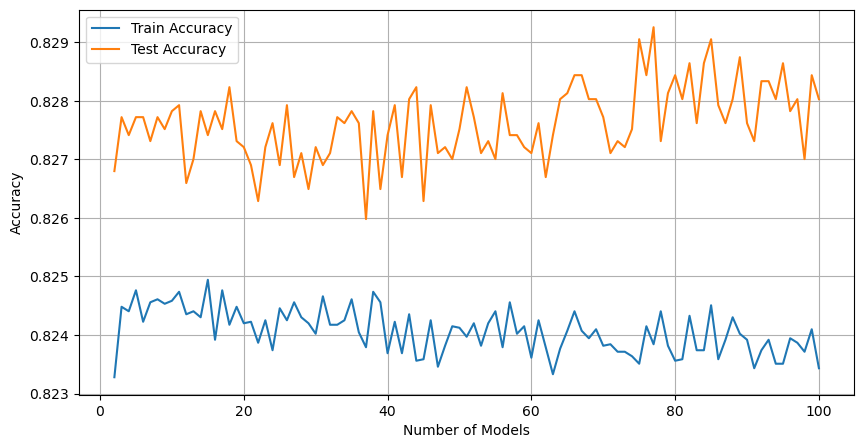

In [60]:
# Your code goes here!

train_accuracies = []
test_accuracies = []

for i in range(2, 101):
    model_storage = []
    for index in range(i):
        start, end = index * len(features_train) // i, (index + 1) * len(features_train) // i
        logistic_reg = LogisticRegression(max_iter=1000)
        logistic_reg.fit(features_train[start:end], target_train.iloc[start:end])
        model_storage.append(logistic_reg)

    majority_vote = lambda models, X: np.mean([model.predict(X) for model in models], axis=0) >= 0.5

    train_accuracy = accuracy_score(target_train, majority_vote(model_storage, features_train))
    test_accuracy = accuracy_score(target_test, majority_vote(model_storage, features_test))
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Number of models: {i}, Train accuracy: {train_accuracy}, Test accuracy: {test_accuracy}")

plt.figure(figsize=(10, 5))
plt.plot(range(2, 101), train_accuracies, label='Train Accuracy')
plt.plot(range(2, 101), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Question:** Analyze the results.

**Your Answer:**
as we can see from the output of the code the value of Accuracy doesn't change in big orders. also it isn't increasing or decreasing at all, and it increases and decreases versus increasing number of models. we can see that the maximum accuracy occurs at number of models : 77 and the maximum accuracy is : 0.8292558091923431 